Loading processed data...
Data shape: (36429, 9)
Checking for NaN values...
title_clean    0
text_clean     0
dtype: int64
Loading Sentence Transformer model...
Generating training embeddings...


Generating embeddings: 100%|██████████| 8/8 [10:58<00:00, 82.31s/it]


Generating test embeddings...


Generating embeddings: 100%|██████████| 2/2 [02:42<00:00, 81.23s/it]


Embeddings shape - Train: (29143, 384), Test: (7286, 384)

=== TRAINING MODELS ON EMBEDDINGS ===


  0%|          | 0/5 [00:00<?, ?it/s]


Training Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training time: 4.67 seconds
=== Logistic Regression Evaluation ===
Accuracy: 0.9505
F1 Score: 0.9548

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3328
           1       0.95      0.96      0.95      3958

    accuracy                           0.95      7286
   macro avg       0.95      0.95      0.95      7286
weighted avg       0.95      0.95      0.95      7286



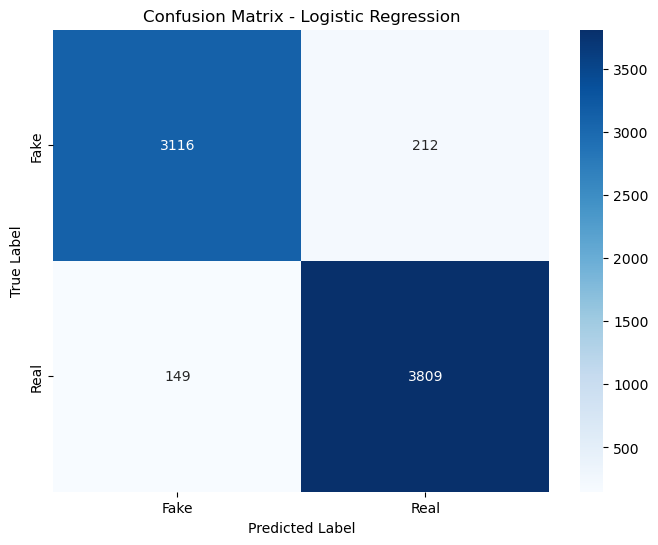

 20%|██        | 1/5 [00:04<00:19,  4.92s/it]


Training Linear SVM...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training time: 8.40 seconds
=== Linear SVM Evaluation ===
Accuracy: 0.9569
F1 Score: 0.9605

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3328
           1       0.96      0.96      0.96      3958

    accuracy                           0.96      7286
   macro avg       0.96      0.96      0.96      7286
weighted avg       0.96      0.96      0.96      7286



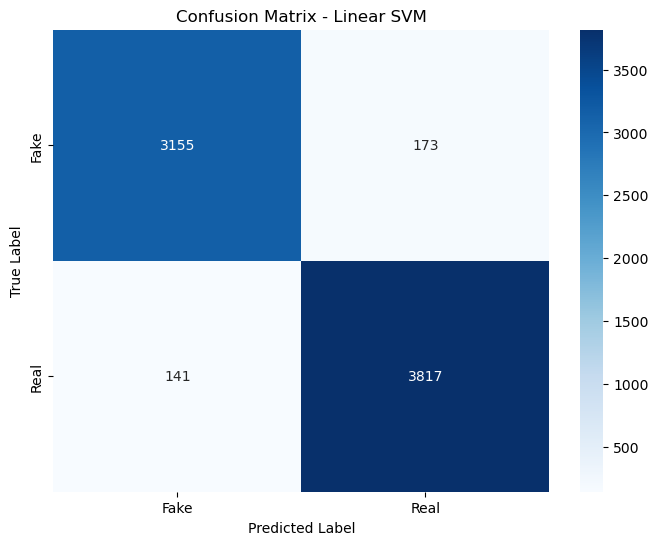

 40%|████      | 2/5 [00:13<00:21,  7.05s/it]


Training Random Forest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training time: 551.06 seconds
=== Random Forest Evaluation ===
Accuracy: 0.8977
F1 Score: 0.9076

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3328
           1       0.89      0.92      0.91      3958

    accuracy                           0.90      7286
   macro avg       0.90      0.90      0.90      7286
weighted avg       0.90      0.90      0.90      7286



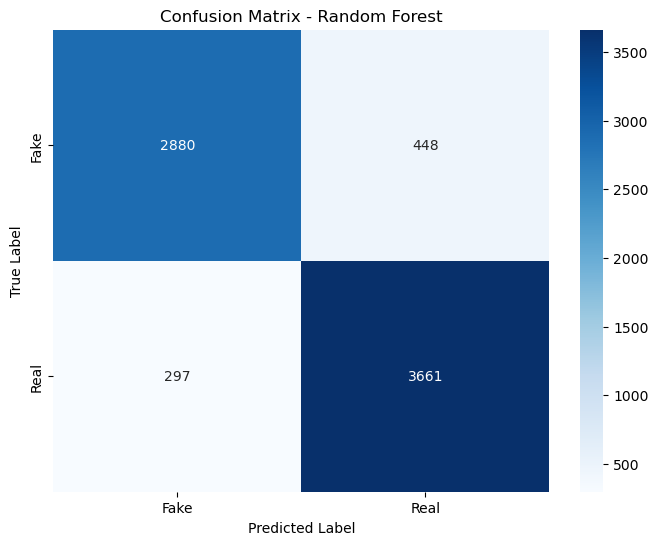

 60%|██████    | 3/5 [09:24<08:31, 255.61s/it]


Training Gaussian NB...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training time: 0.83 seconds
=== Gaussian NB Evaluation ===
Accuracy: 0.8413
F1 Score: 0.8498

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      3328
           1       0.87      0.83      0.85      3958

    accuracy                           0.84      7286
   macro avg       0.84      0.84      0.84      7286
weighted avg       0.84      0.84      0.84      7286



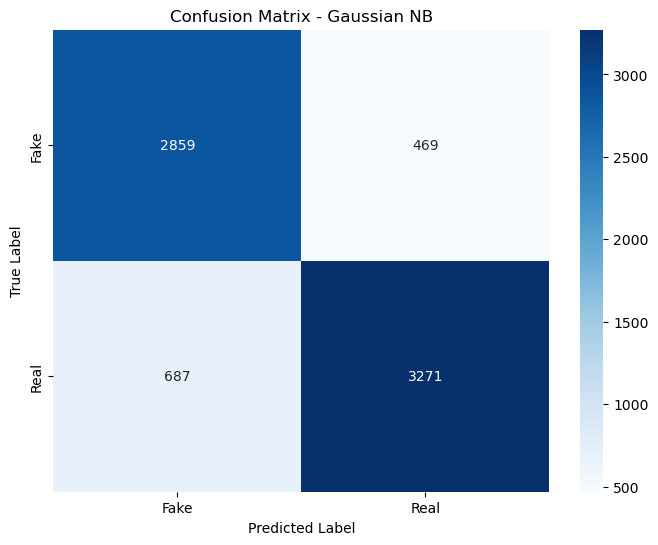

 80%|████████  | 4/5 [09:25<02:35, 155.10s/it]


Training XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Amin\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:47:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training time: 182.81 seconds
=== XGBoost Evaluation ===
Accuracy: 0.9380
F1 Score: 0.9434

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3328
           1       0.94      0.95      0.94      3958

    accuracy                           0.94      7286
   macro avg       0.94      0.94      0.94      7286
weighted avg       0.94      0.94      0.94      7286



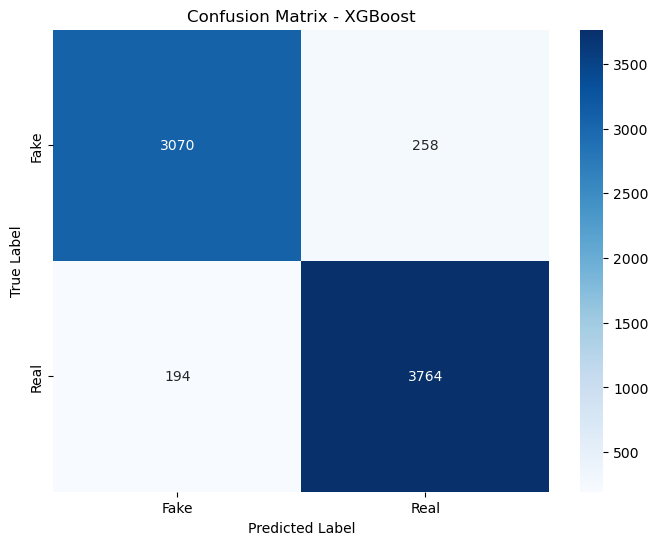

100%|██████████| 5/5 [12:28<00:00, 149.78s/it]


=== EMBEDDING MODELS COMPARISON ===
                 Model  Accuracy  F1_Score  Training_Time_sec  \
1           Linear SVM  0.956904  0.960493           8.401492   
0  Logistic Regression  0.950453  0.954756           4.666674   
4              XGBoost  0.937963  0.943358         182.811476   
2        Random Forest  0.897749  0.907648         551.059938   
3          Gaussian NB  0.841340  0.849831           0.833300   

                                         Best_Params  
1                                          {'C': 10}  
0                         {'C': 10, 'penalty': 'l2'}  
4  {'learning_rate': 0.1, 'max_depth': 6, 'n_esti...  
2           {'max_depth': None, 'n_estimators': 200}  
3                           {'var_smoothing': 1e-09}  


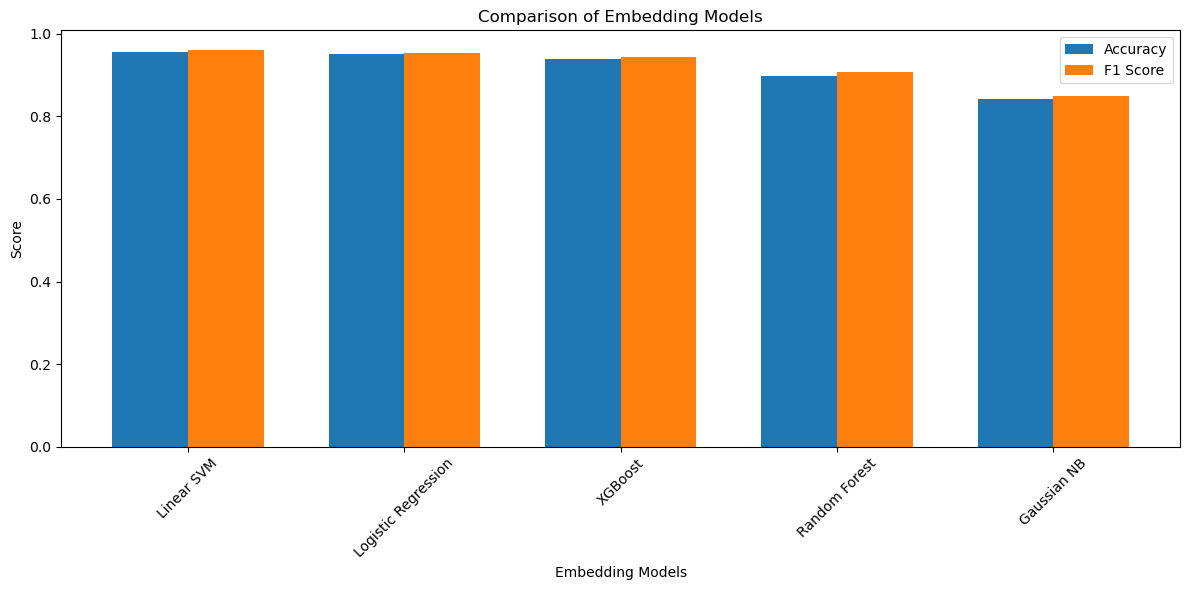


=== Best Advanced Embedding Model Evaluation ===
=== Best Embedding (Linear SVM) Evaluation ===
Accuracy: 0.9569
F1 Score: 0.9605

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3328
           1       0.96      0.96      0.96      3958

    accuracy                           0.96      7286
   macro avg       0.96      0.96      0.96      7286
weighted avg       0.96      0.96      0.96      7286



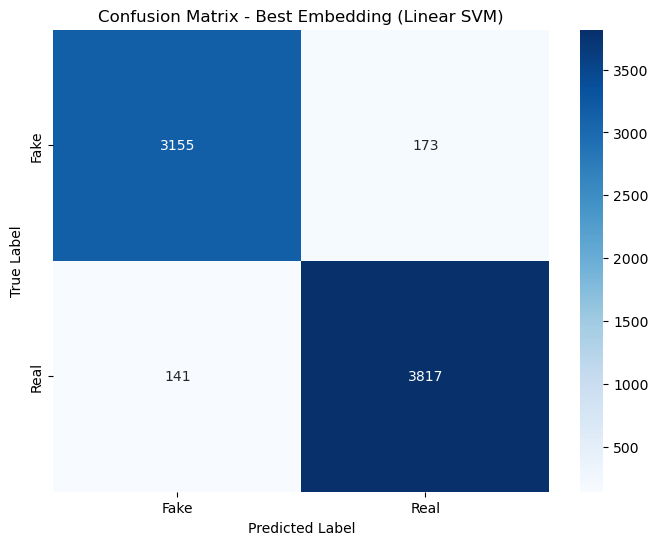


Best advanced embedding model (Linear SVM) saved!


In [ ]:
# 05_Advanced_Embeddings.ipynb
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from config import *
from utils.init import *
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm

def run_embedding_pipeline():
    # Load processed data
    print("Loading processed data...")
    df = pd.read_csv(PROCESSED_TRAIN_PATH)
    print(f"Data shape: {df.shape}")

    # Check for NaN values
    print("Checking for NaN values...")
    print(df[['title_clean', 'text_clean']].isna().sum())

    # Handle any remaining NaN values
    df['title_clean'] = df['title_clean'].fillna('no content')
    df['text_clean'] = df['text_clean'].fillna('no content')

    # Split data
    X = df[['title_clean', 'text_clean']]
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )

    # Combine title and text with robust handling
    def safe_combine_text(title, text):
        title = str(title) if not pd.isna(title) else 'no content'
        text = str(text) if not pd.isna(text) else 'no content'
        combined = f"{title} {text}".strip()
        return combined if combined != '' else 'no content'

    X_train_combined = X_train.apply(lambda row: safe_combine_text(row['title_clean'], row['text_clean']), axis=1)
    X_test_combined = X_test.apply(lambda row: safe_combine_text(row['title_clean'], row['text_clean']), axis=1)

    # Load Sentence Transformer
    print("Loading Sentence Transformer model...")
    embed_model = SentenceTransformer('all-MiniLM-L6-v2')

    # Generate embeddings with robust text handling
    def generate_embeddings(texts, batch_size=4096):
        embeddings = []
        for i in tqdm(range(0, len(texts), batch_size), desc="Generating embeddings"):
            batch = texts[i:i+batch_size].tolist()
            batch = [str(text) if not pd.isna(text) else 'no content' for text in batch]
            batch = [text if text != '' else 'no content' for text in batch]
            batch_embeddings = embed_model.encode(batch)
            embeddings.append(batch_embeddings)
        return np.vstack(embeddings)

    print("Generating training embeddings...")
    X_train_embeddings = generate_embeddings(X_train_combined, batch_size=4096)

    print("Generating test embeddings...")
    X_test_embeddings = generate_embeddings(X_test_combined, batch_size=4096)

    print(f"Embeddings shape - Train: {X_train_embeddings.shape}, Test: {X_test_embeddings.shape}")

    # Define models & parameter grids
    embedding_models = {
        'LogisticRegression': {
            'model': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
            'params': {'C': [0.1, 1, 10], 'penalty': ['l2']},
            'comment': 'Logistic Regression'
        },
        'LinearSVC': {
            'model': LinearSVC(random_state=RANDOM_STATE, max_iter=2000),
            'params': {'C': [0.1, 1, 10]},
            'comment': 'Linear SVM'
        },
        'RandomForest': {
            'model': RandomForestClassifier(random_state=RANDOM_STATE),
            'params': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
            'comment': 'Random Forest'
        },

        'GaussianNB': {
            'model': GaussianNB(),
            'params': {'var_smoothing': [1e-9, 1e-8, 1e-7]},
            'comment': 'Gaussian NB'
        },
        'XGBoost': {
            'model': XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss'),
            'params': {'n_estimators': [100, 200], 'max_depth': [3,6], 'learning_rate': [0.01, 0.1]},
            'comment': 'XGBoost'
        },
    }

    # Train and evaluate embedding models with GridSearchCV
    embedding_results = {}
    print("\n=== TRAINING MODELS ON EMBEDDINGS ===")
    for name, info in tqdm(embedding_models.items()):
        print(f"\nTraining {info['comment']}...")
        start_time = time.time()
        grid_search = GridSearchCV(
            estimator=info['model'],
            param_grid=info['params'],
            cv=StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE),
            scoring='f1',
            n_jobs=-1,
            verbose=2
        )
        grid_search.fit(X_train_embeddings, y_train)
        elapsed = time.time() - start_time
        print(f"Training time: {elapsed:.2f} seconds")
        best_model = grid_search.best_estimator_
        results = evaluate_model(best_model, X_test_embeddings, y_test, info['comment'])
        embedding_results[name] = {
            'accuracy': results['accuracy'],
            'f1_score': results['f1_score'],
            'training_time': elapsed,
            'best_params': grid_search.best_params_,
            'model': best_model
        }

    # Comparison dataframe and graph
    embedding_comparison_df = pd.DataFrame({
        'Model': [info['comment'] for info in embedding_models.values()],
        'Accuracy': [r['accuracy'] for r in embedding_results.values()],
        'F1_Score': [r['f1_score'] for r in embedding_results.values()],
        'Training_Time_sec': [r['training_time'] for r in embedding_results.values()],
        'Best_Params': [r['best_params'] for r in embedding_results.values()]
    }).sort_values('F1_Score', ascending=False)

    print("\n=== EMBEDDING MODELS COMPARISON ===")
    print(embedding_comparison_df)

    # Plot Accuracy vs F1 Score
    plt.figure(figsize=(12,6))
    x_pos = np.arange(len(embedding_comparison_df))
    width = 0.35
    plt.bar(x_pos - width/2, embedding_comparison_df['Accuracy'], width, label='Accuracy')
    plt.bar(x_pos + width/2, embedding_comparison_df['F1_Score'], width, label='F1 Score')
    plt.xticks(x_pos, embedding_comparison_df['Model'], rotation=45)
    plt.xlabel('Embedding Models')
    plt.ylabel('Score')
    plt.title('Comparison of Embedding Models')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Compare and save the best advanced embedding model
    best_embedding_idx = embedding_comparison_df.index[0]
    best_embedding_name = embedding_comparison_df.loc[best_embedding_idx, 'Model']
    best_embedding_key = list(embedding_models.keys())[best_embedding_idx]
    best_embedding_model = embedding_results[best_embedding_key]['model']

    print("\n=== Best Advanced Embedding Model Evaluation ===")
    evaluate_model(best_embedding_model, X_test_embeddings, y_test, f"Best Embedding ({best_embedding_name})")

    # Save the best advanced embedding model
    joblib.dump(best_embedding_model, MODELS_DIR / 'best_embedding_model.pkl')
    print(f"\nBest advanced embedding model ({best_embedding_name}) saved!")

# Call the pipeline function 
run_embedding_pipeline()